In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dft1=pd.read_csv('Tesla-1y.csv',index_col='Date')
dft1= dft1.reindex(index=dft1.index[::-1])
dft1

,Close/Last,Volume,Open,High,Low
Date,,,,,
10/30/2023,$197.36,136448200,$209.28,$210.88,$194.67
10/31/2023,$200.84,118068300,$196.12,$202.80,$194.07
11/01/2023,$205.66,121661700,$204.04,$205.99,$197.85
11/02/2023,$218.51,125987600,$212.97,$219.20,$211.45
11/03/2023,$219.96,119534800,$221.15,$226.3701,$218.40
...,...,...,...,...,...
10/22/2024,$217.97,43268740,$217.31,$218.22,$215.26
10/23/2024,$213.65,80938890,$217.125,$218.72,$212.11
10/24/2024,$260.48,204491900,$244.68,$262.1199,$242.65


In [5]:
#dft1['Open orig']=dft1['Open'].copy()
dft1['Open']=dft1['Open'].str.replace('$','').astype(float)
dft1['High']=dft1['High'].str.replace('$','').astype(float)
dft1['Low']=dft1['Low'].str.replace('$','').astype(float)
dft1['Close/Last']=dft1['Close/Last'].str.replace('$','').astype(float)
dft1

,Close/Last,Volume,Open,High,Low
Date,,,,,
10/30/2023,197.36,136448200,209.280,210.8800,194.67
10/31/2023,200.84,118068300,196.120,202.8000,194.07
11/01/2023,205.66,121661700,204.040,205.9900,197.85
11/02/2023,218.51,125987600,212.970,219.2000,211.45
11/03/2023,219.96,119534800,221.150,226.3701,218.40
...,...,...,...,...,...
10/22/2024,217.97,43268740,217.310,218.2200,215.26
10/23/2024,213.65,80938890,217.125,218.7200,212.11
10/24/2024,260.48,204491900,244.680,262.1199,242.65


In [6]:
dft1.describe()

,Close/Last,Volume,Open,High,Low
count,251.000000,2.510000e+02,251.000000,251.000000,251.000000
mean,208.793147,9.924066e+07,208.723498,212.889486,204.517142
std,30.363228,3.189105e+07,30.339418,30.904307,29.630747
min,142.050000,4.326874e+07,140.560000,144.440000,138.802500
25%,180.000000,7.657472e+07,181.900000,184.420000,176.960000
50%,209.210000,9.543807e+07,210.030000,215.380000,206.270000
75%,236.545000,1.167754e+08,235.035000,239.746450,232.070000
max,269.190000,2.438697e+08,270.000000,273.536000,262.240000


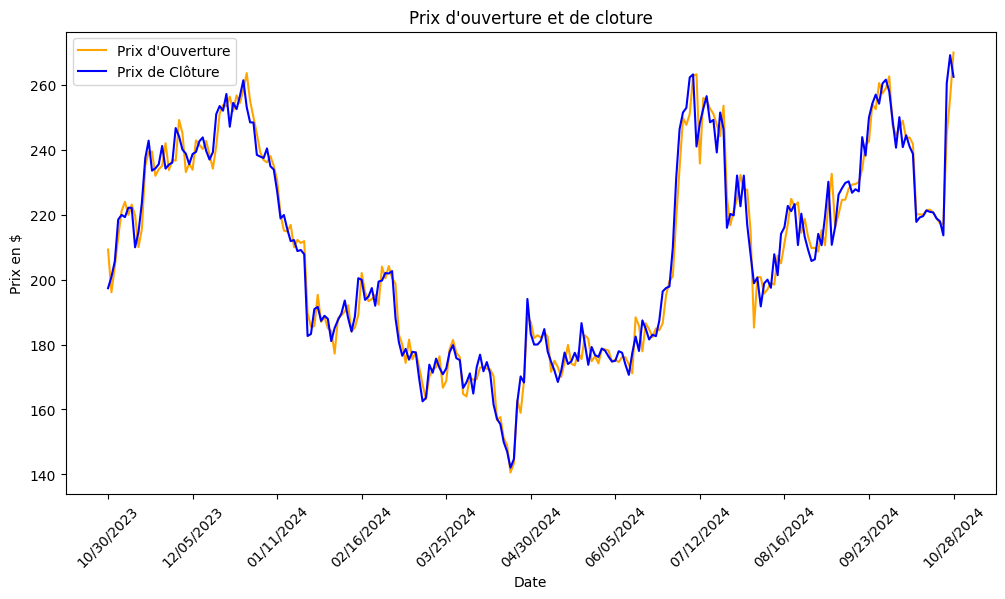

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(dft1['Open'], label="Prix d'Ouverture", color='orange')
plt.plot(dft1['Close/Last'], label='Prix de Clôture', color='blue')

abs = range(0, len(dft1), 25)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix en $')
plt.title('Prix d\'ouverture et de cloture')
plt.legend()
plt.show()

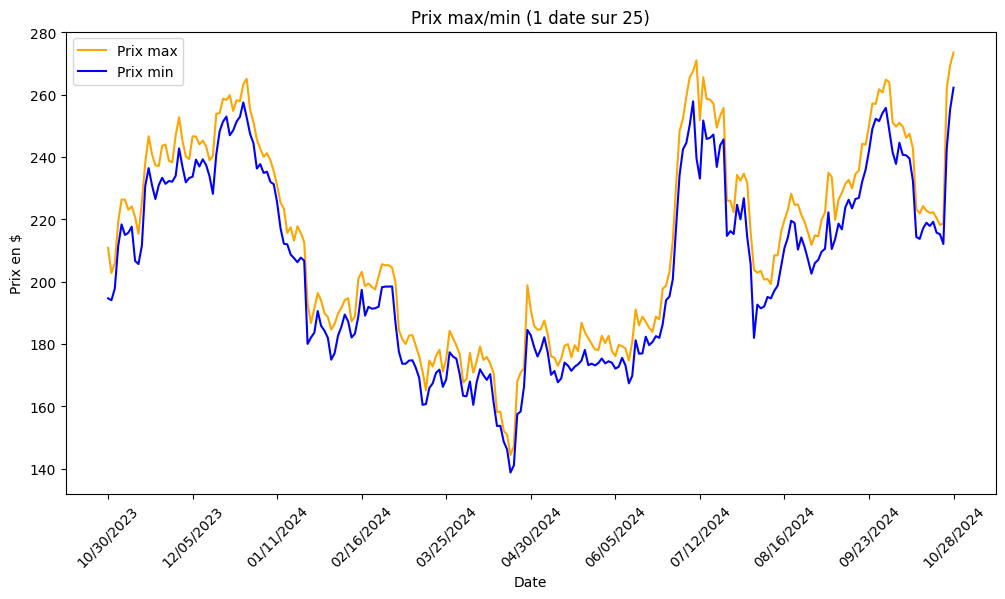

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(dft1['High'], label="Prix max", color='orange')
plt.plot(dft1['Low'], label='Prix min', color='blue')

abs = range(0, len(dft1), 25)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix en $')
plt.title('Prix max/min (1 date sur 25)')
plt.legend()
plt.show()

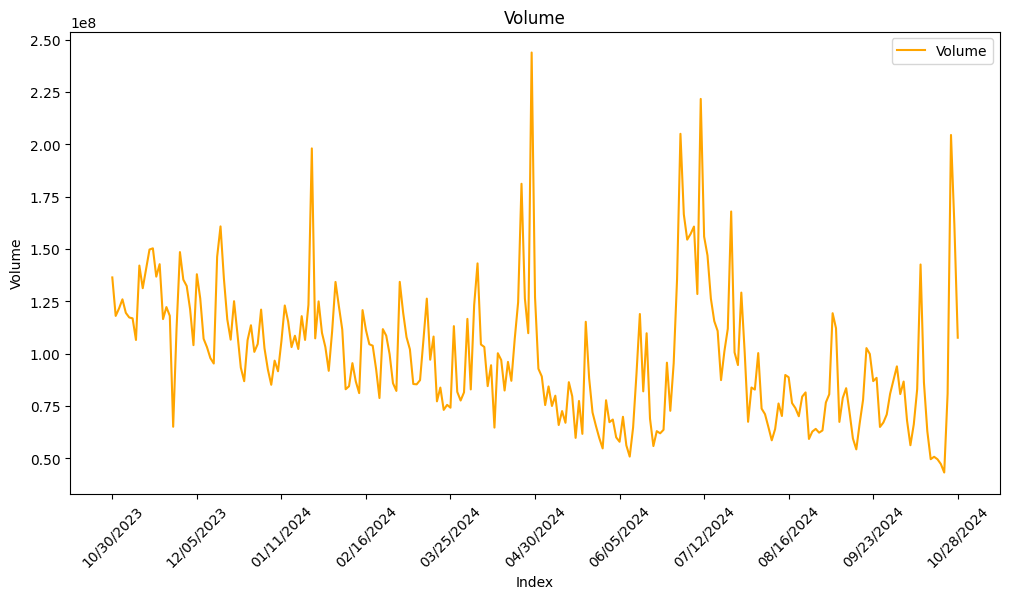

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(dft1['Volume'], label="Volume", color='orange')


abs = range(0, len(dft1), 25)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Index')
plt.ylabel('Volume')
plt.title('Volume')
plt.legend()
plt.show()

In [10]:
dft1.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

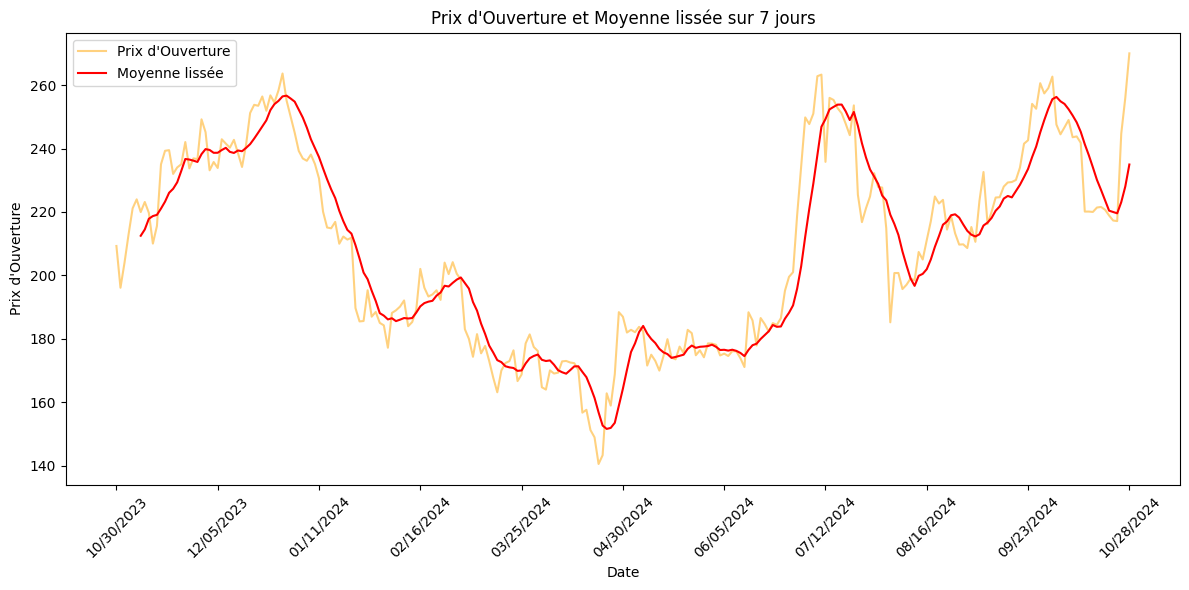

In [13]:
dft1['Moyenne lissée'] = dft1['Open'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(dft1['Open'], label="Prix d'Ouverture", color='orange', alpha=0.5)
plt.plot(dft1['Moyenne lissée'], label='Moyenne lissée', color='red')

abs = range(0, len(dft1), 25)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix d\'Ouverture en $')
plt.title('Prix d\'Ouverture et Moyenne lissée sur 7 jours')
plt.legend()
plt.tight_layout()
plt.show()